In [1]:
%matplotlib inline
from sklearn.model_selection import train_test_split

from models import *

def Volatile(x):
    return Variable(x, volatile=True)

In [2]:
batch_size = 8
total_minibatches = Data.create_minibatches('resnet_v1_50', 'block3', batch_size)

X_train, X_test, y_train, y_test = train_test_split([i[0] for i in total_minibatches], [i[1] for i in total_minibatches], test_size=0.2)


net = Fetures2ECoGTrans(features_dim=X_test[0].shape[3], hidden_dim=y_test[0].shape[1])
opt = torch.optim.RMSprop(net.parameters(), lr=0.001)
mse = torch.nn.MSELoss()

n_train = len(y_train)
epoch = 0
max_epochs = 15
while epoch < max_epochs:
    sum_loss = 0
    for idx, t in enumerate(X_train):
        net.zero_grad()
        w, output = net(Variable(t))
        loss = mse(output, Variable(y_train[idx]))
        loss.backward()
        opt.step()
        sum_loss += loss.data[0]
    epoch += 1
    print('[{:2d}] {:5.3f}'.format(epoch, sum_loss / n_train))


[ 1] 0.903
[ 2] 0.589
[ 3] 0.473
[ 4] 0.409
[ 5] 0.365
[ 6] 0.333
[ 7] 0.310
[ 8] 0.294
[ 9] 0.283
[10] 0.275
[11] 0.270
[12] 0.267
[13] 0.265
[14] 0.264
[15] 0.263


In [3]:
n_valid = len(y_test)
sum_loss = 0
for idx, t in enumerate(X_test):
    w, output = net(Volatile(t))
    loss = mse(output, Volatile(y_test[idx]))
    sum_loss += loss.data[0]


print('valid loss: {:5.3f}'.format(sum_loss / n_valid))

valid loss: 0.352


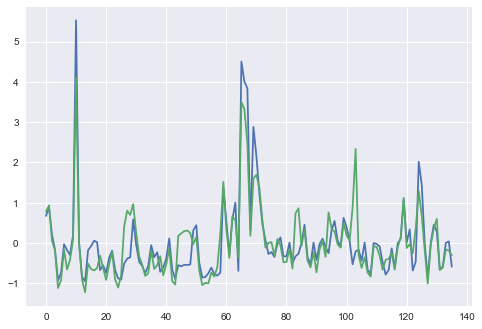

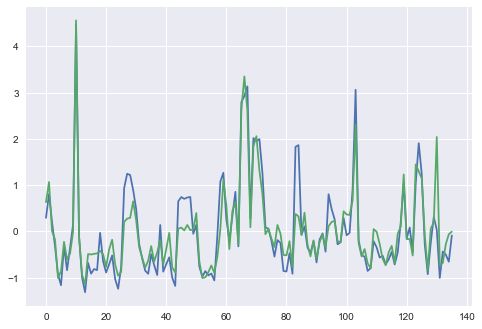

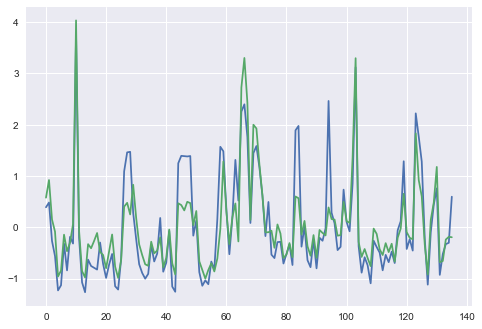

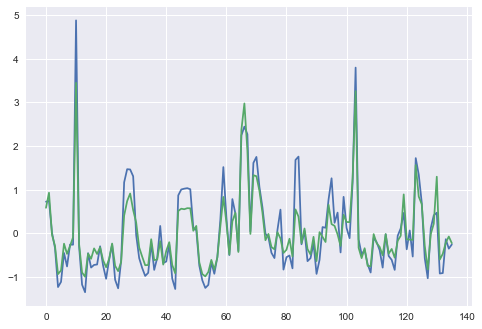

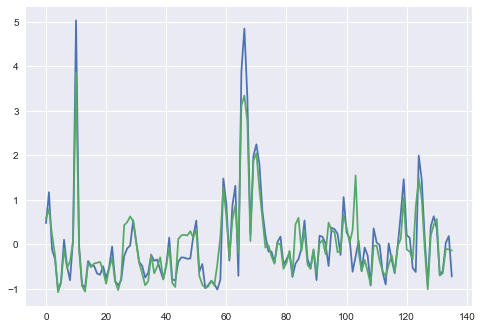

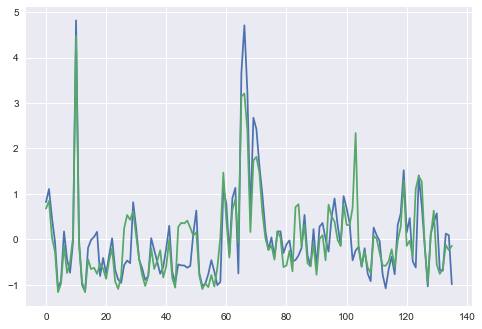

In [5]:
import random
indices = random.sample(range(len(X_test)),  6)
for idx in indices:
    batch = random.sample(range(8),  1)
    w, output = net(Volatile(X_test[idx]))
    plt.plot(y_test[idx][batch[0]])
    plt.plot(output.data[batch[0]])
    plt.show()